In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
data = []
time = []

with open('/content/Sunspots.csv') as csvfile:
  reader = csv.reader(csvfile)
  next(reader)
  for row in reader:
    data.append(float(row[2]))
    time.append(int(row[0]))

data = np.array(data)
time = np.array(time)

In [ ]:
split_point = 2900
train_data = data[:split_point]
train_time = time[:split_point]
test_data = data[split_point:]
test_time = time[split_point:]

In [ ]:
train_features = tf.expand_dims(train_data, axis=-1)
train_targets = tf.expand_dims(train_data, axis=-1)
test_features = tf.expand_dims(test_data, axis=-1)
test_targets = tf.expand_dims(test_data, axis=-1)

In [ ]:
length = 11
sampling_rate = 1
batch_size = 128

In [ ]:
train_generator = TimeseriesGenerator(train_features, train_targets, length=length, sampling_rate=sampling_rate, batch_size=batch_size)
test_generator = TimeseriesGenerator(test_features, test_targets, length=length, sampling_rate=sampling_rate, batch_size=batch_size)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=5, padding='causal', activation='relu', input_shape=[None, 1]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1)
])

model.compile(loss='mae',
              optimizer='adam',
              metrics='mae')

history = model.fit(train_generator, epochs=25)

Epoch 1/25
23/23 [==============================] - 11s 117ms/step - loss: 79.6368 - mae: 79.6368
Epoch 2/25
23/23 [==============================] - 3s 115ms/step - loss: 69.5949 - mae: 69.5949
Epoch 3/25
23/23 [==============================] - 3s 118ms/step - loss: 57.6709 - mae: 57.6709
Epoch 4/25
23/23 [==============================] - 3s 116ms/step - loss: 40.1564 - mae: 40.1564
Epoch 5/25
23/23 [==============================] - 3s 115ms/step - loss: 29.2460 - mae: 29.2460
Epoch 6/25
23/23 [==============================] - 3s 116ms/step - loss: 23.6613 - mae: 23.6613
Epoch 7/25
23/23 [==============================] - 3s 116ms/step - loss: 22.6180 - mae: 22.6180
Epoch 8/25
23/23 [==============================] - 3s 116ms/step - loss: 23.3519 - mae: 23.3519
Epoch 9/25
23/23 [==============================] - 3s 116ms/step - loss: 21.7090 - mae: 21.7090
Epoch 10/25
23/23 [==============================] - 3s 115ms/step - loss: 21.9821 - mae: 21.9821
Epoch 11/25
23/23 [=========

In [ ]:
predictions = model.predict(test_generator)
predictions = tf.squeeze(predictions, axis=-1)

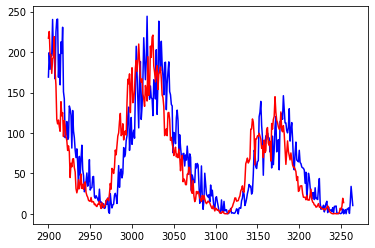

In [ ]:
plt.plot(test_time, test_data, c='b')
plt.plot(test_time[:354], predictions, c='r')